In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from gate import AddGate, MultiplyGate, DotGate, BiasGate, SigmoidGate, ReluGate, SoftmaxGate

In [2]:
np.random.seed(1)

In [3]:
def load_2D_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    return train_X, train_Y, test_X, test_Y

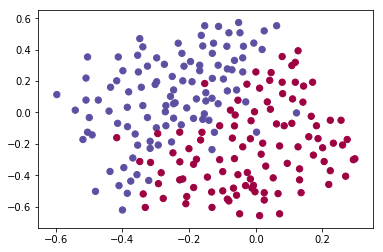

In [4]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()
plt.scatter(train_X[0, :], train_X[1, :], c=np.squeeze(train_Y), s=40, cmap=plt.cm.Spectral);
plt.show()

In [5]:
W1 = np.random.randn(20, 2) * np.sqrt(2 / 2)
b1 = np.zeros((20, 1))
W2 = np.random.randn(7, 20) * np.sqrt(2 / 20)
b2 = np.zeros((7, 1))
W3 = np.random.randn(1, 7) * np.sqrt(2 / 7)
b3 = np.zeros((1, 1))

In [6]:
d1 = DotGate()
z1 = BiasGate()
a1 = ReluGate()
d2 = DotGate()
z2 = BiasGate()
a2 = ReluGate()
d3 = DotGate()
z3 = BiasGate()
a3 = SigmoidGate()

In [7]:
n, m = train_X.shape
print(train_X.shape)

(2, 211)


In [8]:
costs = []
lr = 0.125
for i in range(15000):
    # forward
    D1 = d1.forward(W1, train_X)
    Z1 = z1.forward(D1, b1)
    A1 = a1.forward(Z1)
    D2 = d2.forward(W2, A1)
    Z2 = z2.forward(D2, b2)
    A2 = a2.forward(Z2)
    D3 = d3.forward(W3, A2)
    Z3 = z3.forward(D3, b3)
    A3 = a3.forward(Z3)
    # cost
    logprobs = np.multiply(-np.log(A3),train_Y) + \
    np.multiply(-np.log(1 - A3), 1 - train_Y)
    cost = 1.0/m * np.nansum(logprobs)
    cost = np.squeeze(cost)
    costs.append(cost)
    # backward
    dA3 = 1.0/m * (-(train_Y/A3) + (1-train_Y)/(1-A3))
    dZ3 = a3.backward(dA3)
    dD3, db3 = z3.backward(dZ3)
    dW3, dA2 = d3.backward(dD3)
    dZ2 = a2.backward(dA2)
    dD2, db2 = z2.backward(dZ2)
    dW2, dA1 = d2.backward(dD2)
    dZ1 = a1.backward(dA1)
    dD1, db1 = z1.backward(dZ1)
    dW1, _ = d1.backward(dD1)
    # update
    W3 = W3 - lr*dW3
    b3 = b3 - lr*db3
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    if i%1000 == 0 :
        print('Cost after epoch ' + str(i) + ': ' + str(cost))
        pass
    pass

Cost after epoch 0: 0.7052683096906817
Cost after epoch 1000: 0.22438179981363635
Cost after epoch 2000: 0.21458063106429023
Cost after epoch 3000: 0.20290761079591693
Cost after epoch 4000: 0.19063630386016614
Cost after epoch 5000: 0.17961021788521722
Cost after epoch 6000: 0.17228877258773956
Cost after epoch 7000: 0.16758249718457172
Cost after epoch 8000: 0.16762887512732125
Cost after epoch 9000: 0.16466835466519017
Cost after epoch 10000: 0.1590274026178315
Cost after epoch 11000: 0.15631641811121227
Cost after epoch 12000: 0.15101990347632582
Cost after epoch 13000: 0.14604672102563707
Cost after epoch 14000: 0.13885030590447012


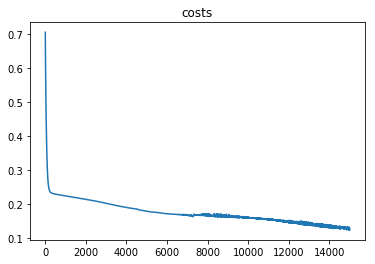

In [9]:
plt.plot(costs)
plt.title('costs')
plt.show()

In [10]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [11]:
def predict(X):
    n, m = X.shape
    # forward
    D1 = d1.forward(W1, X)
    Z1 = z1.forward(D1, b1)
    A1 = a1.forward(Z1)
    D2 = d2.forward(W2, A1)
    Z2 = z2.forward(D2, b2)
    A2 = a2.forward(Z2)
    D3 = d3.forward(W3, A2)
    Z3 = z3.forward(D3, b3)
    A3 = a3.forward(Z3)
    predictions = np.squeeze(A3>0.5)
    return predictions

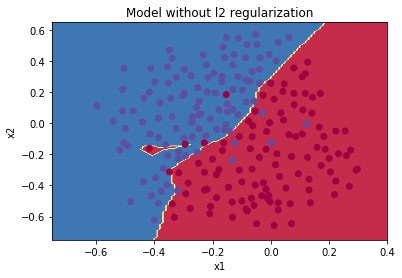

In [12]:
plt.title("Model without l2 regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict(x.T), train_X, train_Y[0, :])

In [13]:
W1 = np.random.randn(20, 2) * np.sqrt(2 / 2)
b1 = np.zeros((20, 1))
W2 = np.random.randn(7, 20) * np.sqrt(2 / 20)
b2 = np.zeros((7, 1))
W3 = np.random.randn(1, 7) * np.sqrt(2 / 7)
b3 = np.zeros((1, 1))

In [14]:
d1 = DotGate()
z1 = BiasGate()
a1 = ReluGate()
d2 = DotGate()
z2 = BiasGate()
a2 = ReluGate()
d3 = DotGate()
z3 = BiasGate()
a3 = SigmoidGate()

In [15]:
n, m = train_X.shape
print(train_X.shape)

(2, 211)


In [16]:
costs = []
lr = 0.125
for i in range(15000):
    # forward
    D1 = d1.forward(W1, train_X)
    Z1 = z1.forward(D1, b1)
    A1 = a1.forward(Z1)
    D2 = d2.forward(W2, A1)
    Z2 = z2.forward(D2, b2)
    A2 = a2.forward(Z2)
    D3 = d3.forward(W3, A2)
    Z3 = z3.forward(D3, b3)
    A3 = a3.forward(Z3)
    # cost
    logprobs = np.multiply(-np.log(A3),train_Y) + \
    np.multiply(-np.log(1 - A3), 1 - train_Y)
    cross_entropy_cost = 1.0/m * np.nansum(logprobs)
    cross_entropy_cost = np.squeeze(cross_entropy_cost)
    # l2 regularization
    l2_regularization_cost = 0.0
    lambda1 = 0.7
    lambda2 = 0.7
    lambda3 = 0.7
    l2_regularization_cost += 1.0/m * lambda1 * np.sum(np.square(W1)) / 2
    l2_regularization_cost += 1.0/m * lambda2 * np.sum(np.square(W2)) / 2
    l2_regularization_cost += 1.0/m * lambda3 * np.sum(np.square(W3)) / 2
    # l2 regularization
    cost = cross_entropy_cost + l2_regularization_cost
    costs.append(cost)
    # backward
    dA3 = 1.0/m * (-(train_Y/A3) + (1-train_Y)/(1-A3))
    dZ3 = a3.backward(dA3)
    dD3, db3 = z3.backward(dZ3)
    dW3, dA2 = d3.backward(dD3)
    # l2 regularization
    dW3 += lambda3 / m * W3
    # l2 regularization
    dZ2 = a2.backward(dA2)
    dD2, db2 = z2.backward(dZ2)
    dW2, dA1 = d2.backward(dD2)
    # l2 regularization
    dW2 += lambda2 / m * W2
    # l2 regularization
    dZ1 = a1.backward(dA1)
    dD1, db1 = z1.backward(dZ1)
    dW1, _ = d1.backward(dD1)
    # l2 regularization
    dW1 += lambda1 / m * W1
    # l2 regularization
    # update
    W3 = W3 - lr*dW3
    b3 = b3 - lr*db3
    W2 = W2 - lr*dW2
    b2 = b2 - lr*db2
    W1 = W1 - lr*dW1
    b1 = b1 - lr*db1
    if i%1000 == 0 :
        print('Cost after epoch ' + str(i) + ': ' + str(cost))
        pass
    pass

Cost after epoch 0: 0.7942554767974344
Cost after epoch 1000: 0.3036594007731801
Cost after epoch 2000: 0.281533560619975
Cost after epoch 3000: 0.27216527077833536
Cost after epoch 4000: 0.2684171017785462
Cost after epoch 5000: 0.26673155113178676
Cost after epoch 6000: 0.26584469646514686
Cost after epoch 7000: 0.2653372586032155
Cost after epoch 8000: 0.2650325690155708
Cost after epoch 9000: 0.26481773740793285
Cost after epoch 10000: 0.26460329039848485
Cost after epoch 11000: 0.26445972366100834
Cost after epoch 12000: 0.2643501153221899
Cost after epoch 13000: 0.26426187718636507
Cost after epoch 14000: 0.26419291490849345


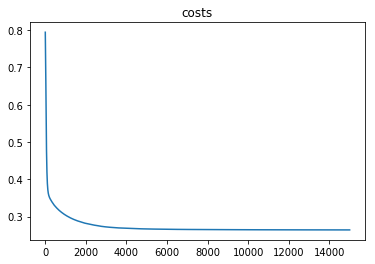

In [17]:
plt.plot(costs)
plt.title('costs')
plt.show()

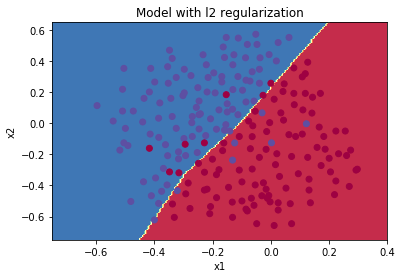

In [18]:
plt.title("Model with l2 regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict(x.T), train_X, train_Y[0, :])